In [10]:
import numpy as np
import pandas as pd 
import dask.dataframe as dd
import matplotlib.pyplot as plt
import seaborn as sns
from dateutil.parser import parse
from dask_ml.model_selection import train_test_split
from src.visualization.visualize import plot_na_by_col

## Load Data

In [3]:
flights = dd.read_parquet('../data/processed/flights.parquet', engine='pyarrow')

In [4]:
len(flights)

5853417

In [5]:
flights.columns

Index(['YEAR', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'FL_DATE',
       'OP_UNIQUE_CARRIER', 'OP_CARRIER_AIRLINE_ID', 'OP_CARRIER', 'TAIL_NUM',
       'OP_CARRIER_FL_NUM', 'ORIGIN_AIRPORT_ID', 'ORIGIN_AIRPORT_SEQ_ID',
       'ORIGIN_CITY_MARKET_ID', 'ORIGIN', 'ORIGIN_CITY_NAME',
       'ORIGIN_STATE_ABR', 'ORIGIN_STATE_FIPS', 'ORIGIN_STATE_NM',
       'ORIGIN_WAC', 'DEST_AIRPORT_ID', 'DEST_AIRPORT_SEQ_ID',
       'DEST_CITY_MARKET_ID', 'DEST', 'DEST_CITY_NAME', 'DEST_STATE_ABR',
       'DEST_STATE_FIPS', 'DEST_STATE_NM', 'DEST_WAC', 'CRS_DEP_TIME',
       'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15',
       'DEP_DELAY_GROUP', 'DEP_TIME_BLK', 'TAXI_OUT', 'WHEELS_OFF',
       'WHEELS_ON', 'TAXI_IN', 'CRS_ARR_TIME', 'ARR_TIME', 'ARR_DELAY',
       'ARR_DELAY_NEW', 'ARR_DEL15', 'ARR_DELAY_GROUP', 'ARR_TIME_BLK',
       'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED', 'CRS_ELAPSED_TIME',
       'ACTUAL_ELAPSED_TIME', 'AIR_TIME', 'FLIGHTS', 'DISTANCE',
       'DISTANCE_GROU

## Split Data

In [7]:
train, test = train_test_split(flights, test_size=0.3, shuffle=True, random_state=1)
val, test = train_test_split(test, test_size=0.5, shuffle=True, random_state=1)

## Missing Data

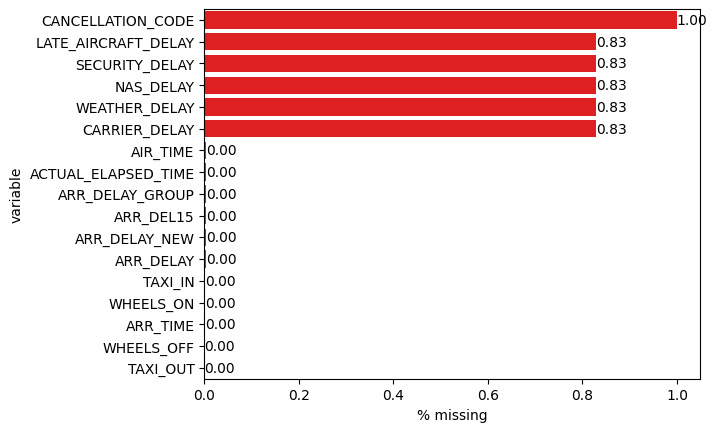

In [8]:
plot_na_by_col(train)

The only columns missing data are those that would introduce leakage when predicting departure delay. Therefore they are safe to remove.

In [9]:
cols_with_na = train.columns[train.isna().any()]
train = train.drop(columns=cols_with_na)